## Scan

In [1]:
import sys

sys.path.append("../")

In [2]:
from settings import prod
from scaut.scan import watch
from scaut.scan.decorators import add_noise, add_plot_params
from scaut.scan.utils import clear_output, plot_generic_data

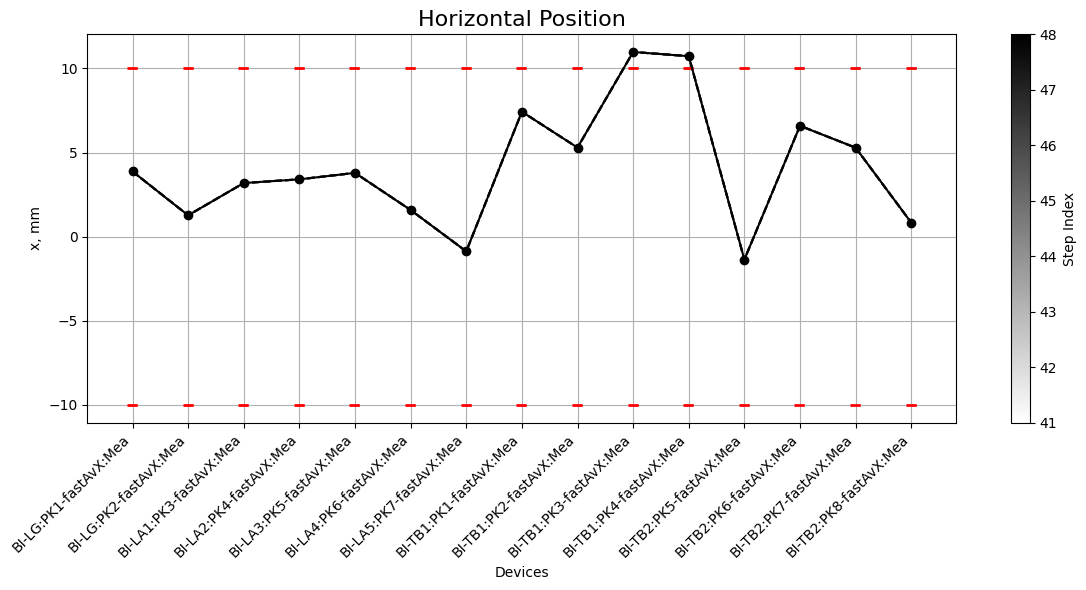

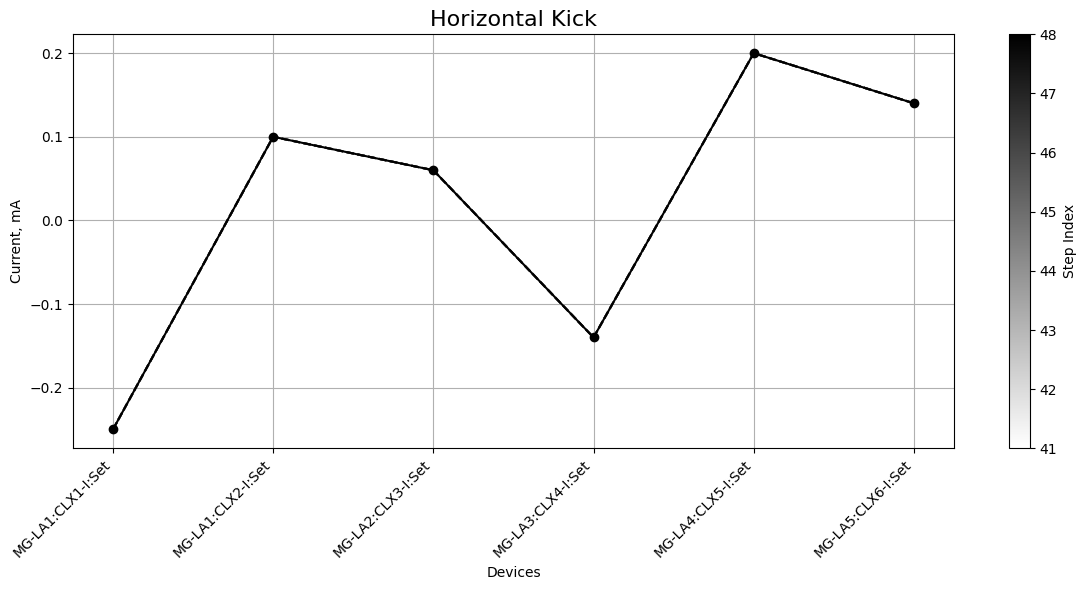

In [12]:
prod_scan = watch(
    motors=prod.ALL_CORRECTORS,
    meters=prod.ALL_HORIZONTAL_POSITION_MONITORS,
    checks=prod.ALL_CURRENT_MONITORS,
    get_func=prod.GET_FUNC, 
    put_func=prod.PUT_FUNC,
    verify_motor=prod.VERIFY_MOTOR, 
    max_retries=prod.MAX_TRIES,
    delay=prod.DELAY,
    tolerance=prod.TOLERANCE,
    sample_size=prod.SAMPLE_SIZE,
    save=prod.SAVE_SCAN,
    path=prod.DIRNAME_DATA,
    callback=[
        clear_output, 
        add_plot_params(
            "meters", "meter_data", "Horizontal Position", "Devices", "x, mm", "meter_ranges", "meter_errors"
        )(plot_generic_data),
    ], 
    save_original_motor_values=prod.SAVE_ORIGINAL_MOTOR_VALUES,
    parallel=prod.PARALLEL,
    strict_check=prod.STRICT_CHECK,
)